In [99]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# Importing Data

In [100]:
!pip install ultralytics 

# Data Distribution

In [101]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import PIL 
from PIL import Image
from IPython.display import display
from glob import glob
import random
import cv2
import warnings
from sklearn.utils import shuffle
import ultralytics
from ultralytics import YOLO
warnings.simplefilter('ignore')

In [102]:
df1 = pd.read_csv('../input/self-driving-cars/labels_train.csv', delimiter=',')
df1.dataframeName = 'labels_train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 132406 rows and 6 columns


In [103]:
def plot_scatter_matrix(data_frame, plot_size, text_size):
    numeric_columns = data_frame.select_dtypes(include=[np.number])
    numeric_columns = numeric_columns[[col for col in numeric_columns if numeric_columns[col].nunique() > 1]]

    column_names = list(numeric_columns)
    if len(column_names) > 10:
        column_names = column_names[:10]

    selected_columns = numeric_columns[column_names]
    scatter_matrix = pd.plotting.scatter_matrix(selected_columns, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde', color='red')
    
    plt.suptitle('Density Plot for Self-Driving Car')
    plt.show()

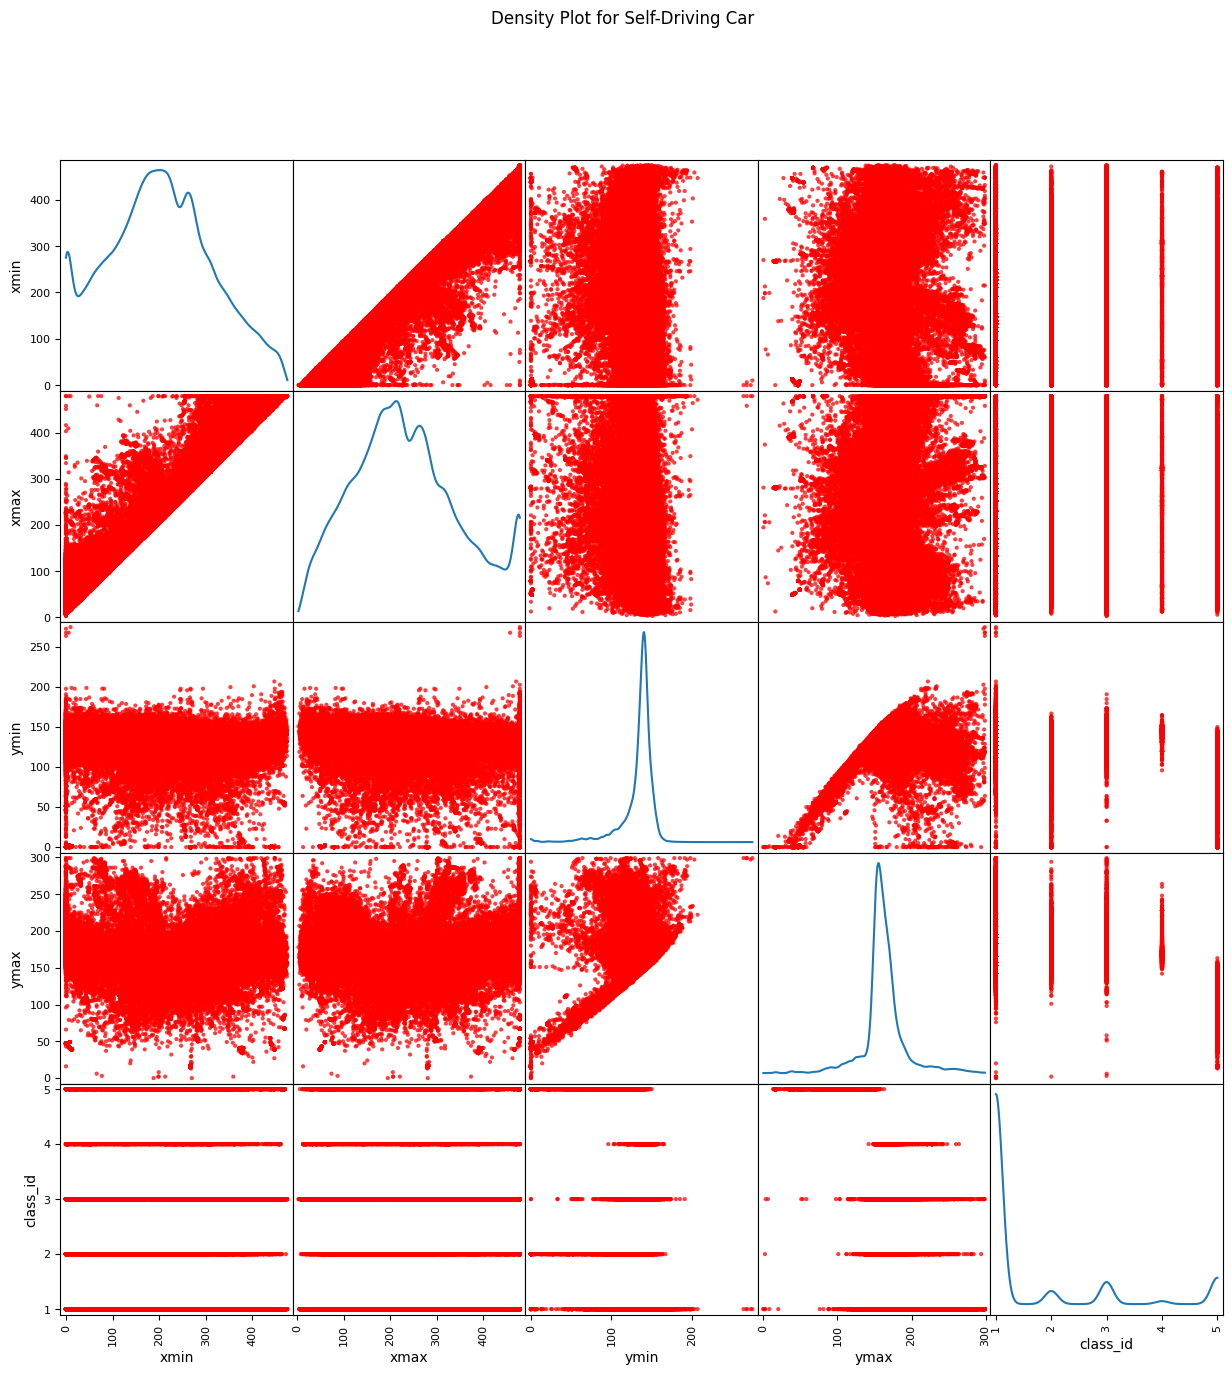

In [104]:
 plot_scatter_matrix(df1, 15, 10)

In [105]:
df = pd.read_csv('../input/self-driving-cars/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
75857,1479500148086792488.jpg,432,454,122,190,3
39317,1478897032910707962.jpg,120,133,151,176,1
30801,1478895572123254302.jpg,318,325,105,117,3
33433,1478896506753926864.jpg,272,324,134,155,1
112740,1479504578384405619.jpg,280,311,129,158,1


In [106]:
print(df.describe())

                xmin           xmax           ymin           ymax  \
count  132406.000000  132406.000000  132406.000000  132406.000000   
mean      202.112223     235.400118     133.525376     162.240148   
std       114.647213     116.401491      20.508451      28.585448   
min         0.000000       3.000000       0.000000       0.000000   
25%       118.000000     150.000000     131.000000     152.000000   
50%       200.000000     224.000000     139.000000     160.000000   
75%       280.000000     312.000000     143.000000     171.000000   
max       475.000000     479.000000     275.000000     299.000000   

            class_id  
count  132406.000000  
mean        1.624692  
std         1.269443  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         5.000000  


In [107]:
classes = df.class_id.unique()
print(classes)

[3 1 5 2 4]


# # labels = { 1:'car', 2:'truck', 3:'person', 4:'bicyclist', 5:'traffic light'}


# ----------------------------------------------------------------------------------------

In [108]:
yolo_model = YOLO('yolov8m.pt')

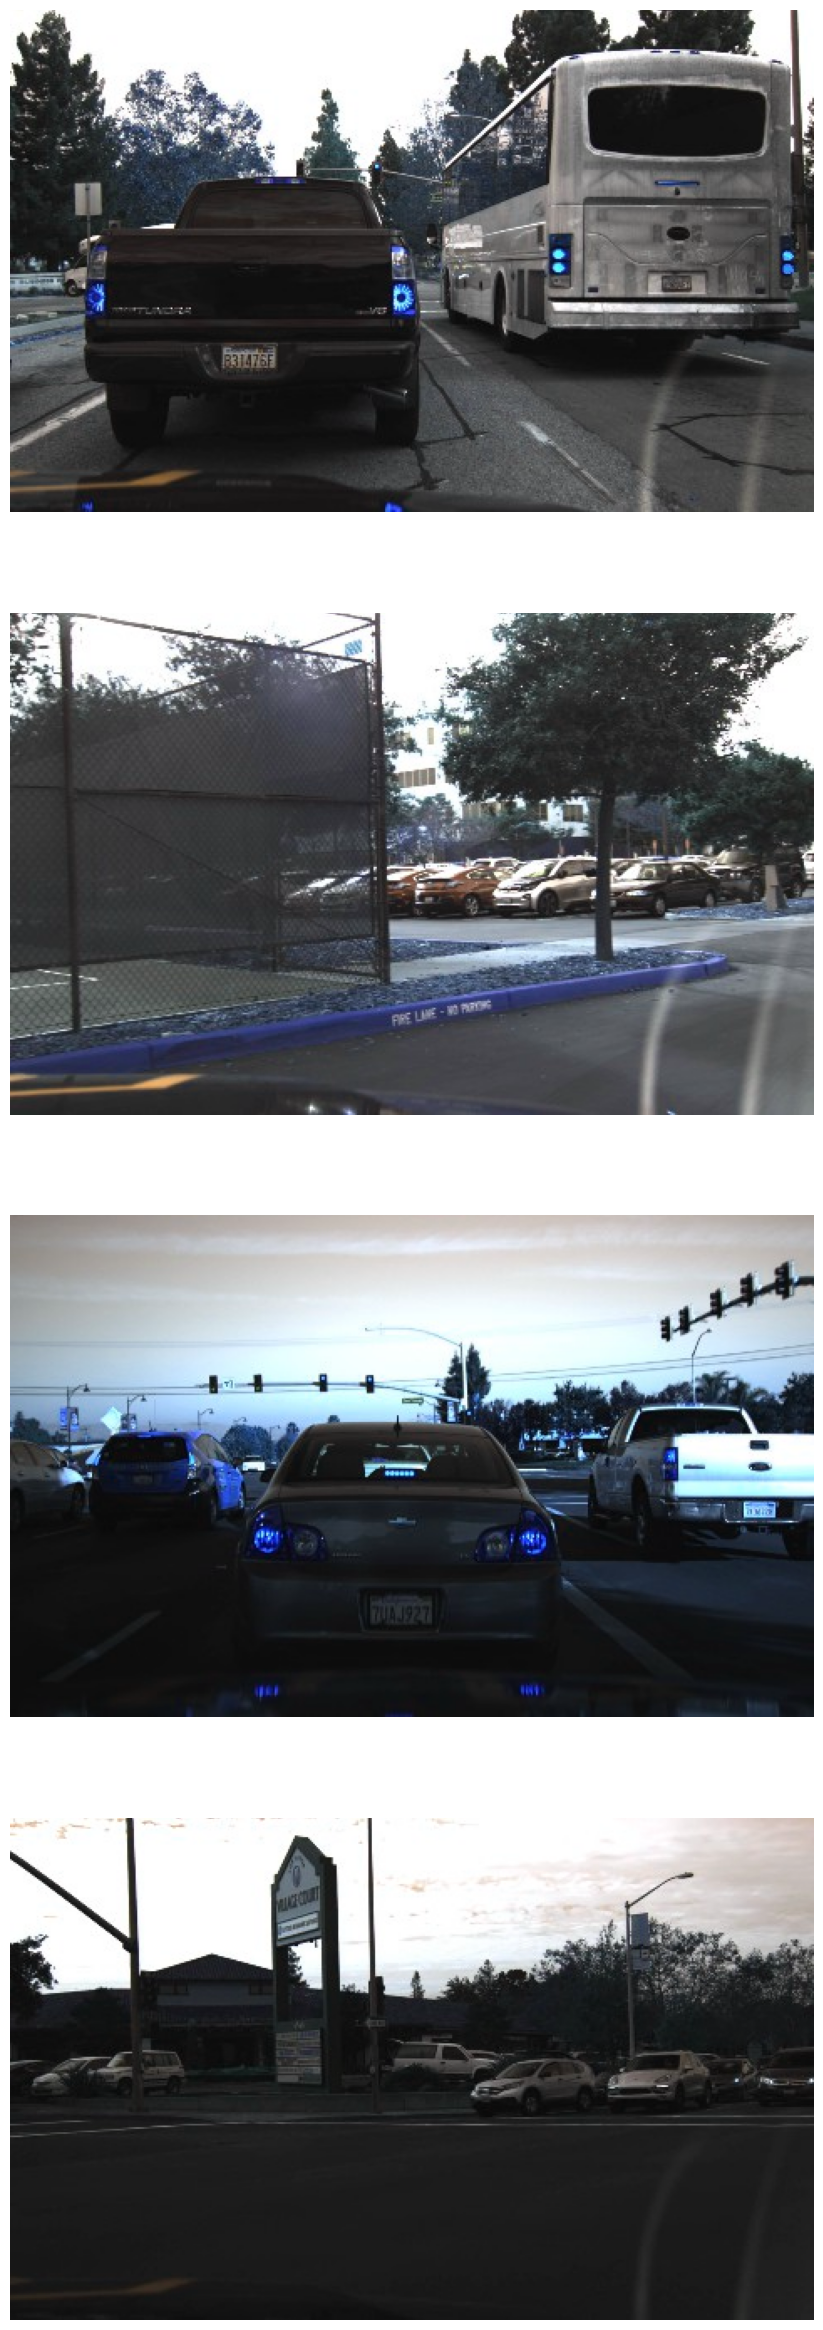

In [109]:
root_path = '/kaggle/input/self-driving-cars/images/*'
num_samples = 8
images_data = glob(root_path)
random_image = random.sample(images_data, 4)

plt.figure(figsize=(45,30))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.imshow(cv2.imread(random_image[i]))

# YOLO ALGORITHM

# - YOLO's single-pass approach speeds up processing, suitable for real-time tasks.
# - YOLO excels in accurately detecting diverse objects within an image.

In [110]:
images_results = []
for i in range(4):
    yolo_outputs = yolo_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names
    
    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}\n')
        
    images_results.append(output.plot()[:, :, ::-1])


image 1/1 /kaggle/input/self-driving-cars/images/1478898080656798149.jpg: 416x640 1 car, 1 bus, 1 truck, 1 traffic light, 370.8ms
Speed: 1.6ms preprocess, 370.8ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: bus
Coordinates are: [256.3369445800781, 23.805335998535156, 471.5893249511719, 205.41302490234375]
Confidence is: 0.96

Object 2 is: truck
Coordinates are: [42.686737060546875, 99.32178497314453, 245.8454132080078, 262.8030090332031]
Confidence is: 0.91

Object 3 is: car
Coordinates are: [31.523345947265625, 146.2796173095703, 46.14905548095703, 171.71022033691406]
Confidence is: 0.61

Object 4 is: traffic light
Coordinates are: [214.59495544433594, 89.7495346069336, 222.5968475341797, 106.12431335449219]
Confidence is: 0.45


image 1/1 /kaggle/input/self-driving-cars/images/1478898543972201351.jpg: 416x640 10 cars, 375.2ms
Speed: 1.3ms preprocess, 375.2ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: car
Coordinate

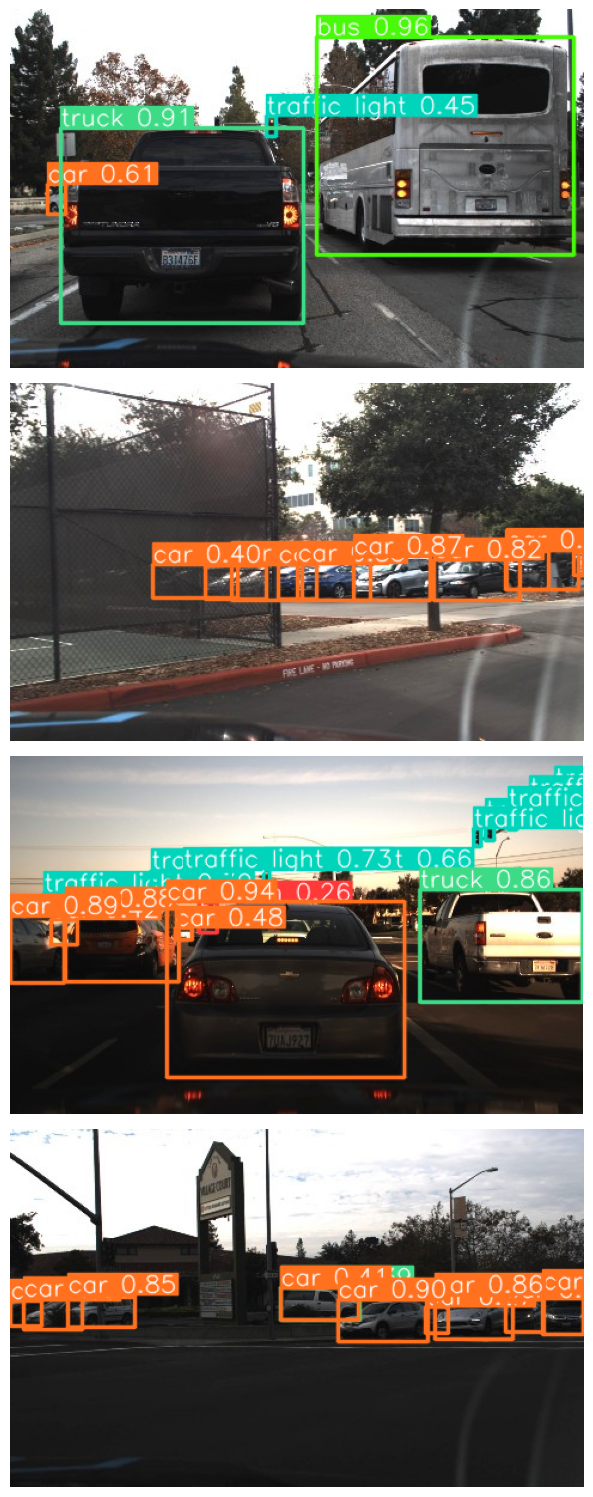

In [111]:
plt.figure(figsize=(45,30))
for i, img in enumerate(images_results):
    plt.subplot(8, 1, i + 1)
    plt.imshow(img)
    plt.axis('off')    
plt.tight_layout()
plt.show()